<a href="https://colab.research.google.com/github/HPNChanel/Colab-Machine-Learning-Model/blob/main/SVM(Support_Vector_Machine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phân loại các loài hoa bằng thuật toán SVM

1. Import các thư viện cần thiết

In [2]:
# Import thư viện
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

2. Load dữ liệu Iris

In [3]:
# Tải bộ dữ liệu Iris(Iris dataset)
iris = load_iris()
X = iris.data[:, :2]  # Lấy ra 2 đặc trưng đầu tiên(sepal length và sepal width(chiều dài và chiều rộng đài hoa))
y = iris.target

# Thông tin về bộ dữ liệu
print("Target Name:", iris.target_names)
print("Feature:", iris.feature_names)
print("X shape:", X.shape)
print("y shape", y.shape)

Target Name: ['setosa' 'versicolor' 'virginica']
Feature: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X shape: (150, 2)
y shape (150,)


3. Chia dữ liệu thành tập train và test

In [4]:
# Chia dữ liệu(80% train và 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

4. Chuẩn hóa dữ liệu

In [5]:
# Chuẩn hóa dữ liệu để đưa về cùng một thang đo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. Huấn luyện mô hình SVM

In [6]:
# Tiến hành huấn luyện mô hình SVM: sử dụng SVM với Linear Kernel
svm_model = SVC(kernel = 'linear', C = 1.0, random_state = 42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

6. Dự đoán và đánh giá

In [8]:
# Dự đoán trên tập test
y_pred = svm_model.predict(X_test)

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Báo cáo và đánh giá mô hình
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



7. Trực quan hóa kết quả

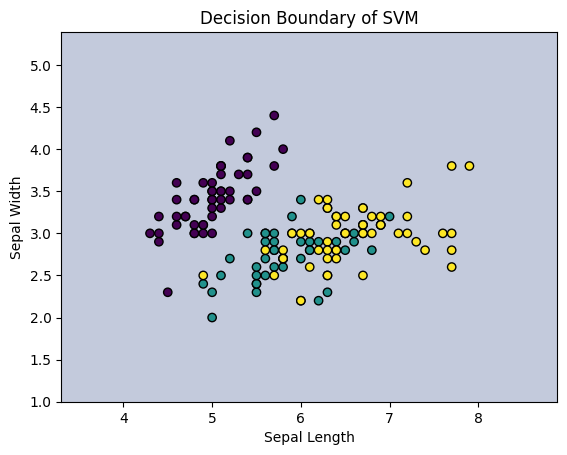

In [9]:
# Trực quan hóa siêu phẳng phân loại(classification hyperplane)

# Thiết lập đồ thị
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán cho mỗi điểm trong lưới
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ vùng quyết định
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolor = 'k', marker = 'o')
plt.title("Decision Boundary of SVM")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# Show đồ thị
plt.show()